Start by importing the csv files

In [25]:
import pandas as pd

baseline_file = "DrugCombDB/baseline_DrugCombDB_test_results.csv"
shuffle_file = "DrugCombDB/rewire_graph_DrugCombDB_test_results_.csv"

base_df = pd.read_csv(baseline_file)
shuffle_df = pd.read_csv(shuffle_file)

Merge the two dataframes

In [26]:

shuffle_df = shuffle_df.drop("fold_id", axis=1).drop("graph_function", axis=1)

base_df = base_df.drop("fold_id", axis=1)
base_df["graph_ratio"] = 0.0

merged_df = pd.concat([shuffle_df, base_df], ignore_index=True)
merged_df = merged_df.groupby('graph_ratio').mean().reset_index()
merged_df = merged_df.drop(columns=["loss"])


Now lets visualize the data

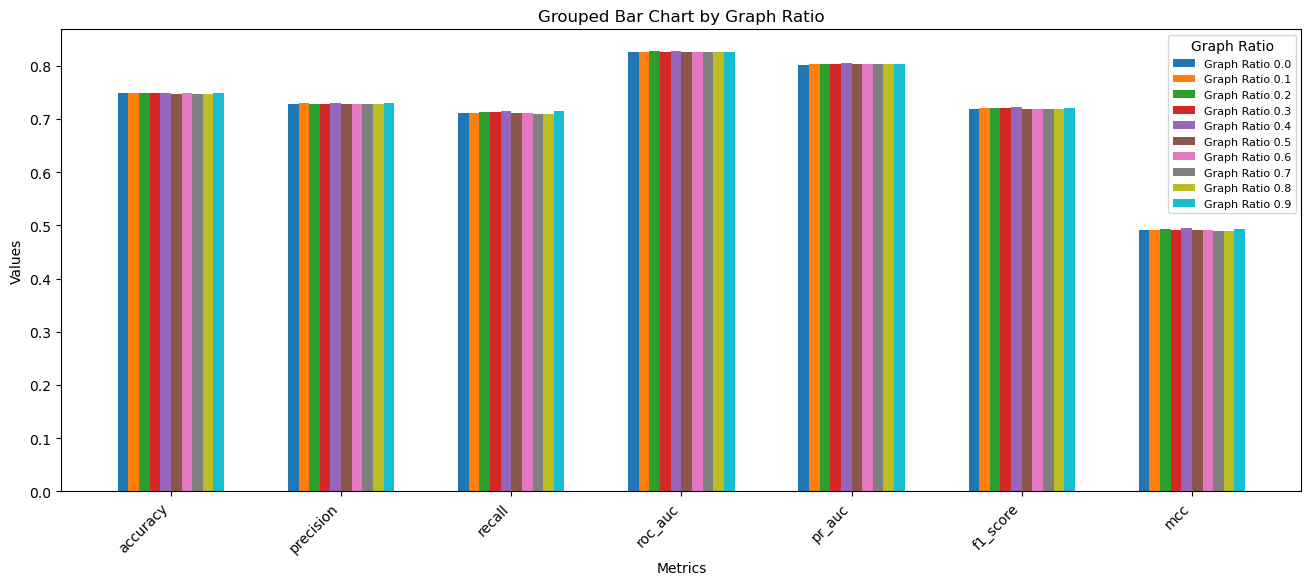

In [27]:
import matplotlib.pyplot as plt

columns_to_plot = [col for col in merged_df.columns if col != 'graph_ratio']

# Create the bar chart
fig, ax = plt.subplots(figsize=(16, 6))  # Increased figure width

# Adjust bar width and spacing
bar_width = 0.1  # Thinner bars
spacing = 0.6    # Increased spacing between metric groups

# Calculate positions for each metric group
x_indices = [i * (1 + spacing) for i in range(len(columns_to_plot))]

# Generate bars for each graph_ratio
for i, ratio in enumerate(merged_df['graph_ratio'].unique()):
    row_data = merged_df[merged_df['graph_ratio'] == ratio]
    y_values = row_data[columns_to_plot].mean()  # Aggregate values (mean or another metric)
    x_positions = [x + i * bar_width for x in x_indices]  # Offset for each bar in the group
    
    ax.bar(
        x_positions,
        y_values,
        width=bar_width,
        label=f'Graph Ratio {ratio}'
    )

# Configure chart appearance
ax.set_xticks([x + (len(merged_df['graph_ratio'].unique()) - 1) * bar_width / 2 for x in x_indices])
ax.set_xticklabels(columns_to_plot, rotation=45, ha='right')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.legend(title='Graph Ratio', fontsize=8, title_fontsize=10)
ax.set_title('Grouped Bar Chart by Graph Ratio')


plt.show()

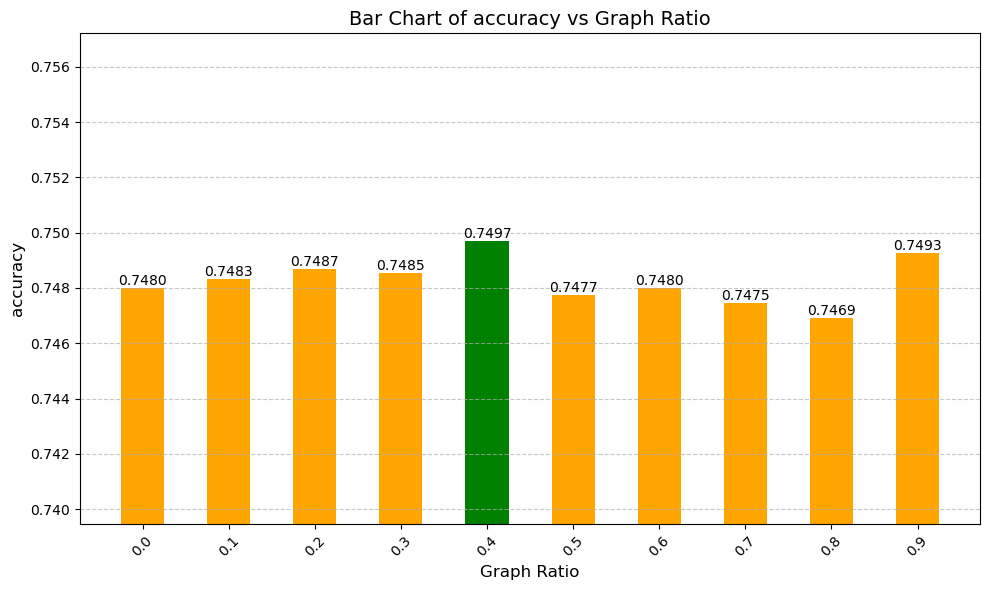

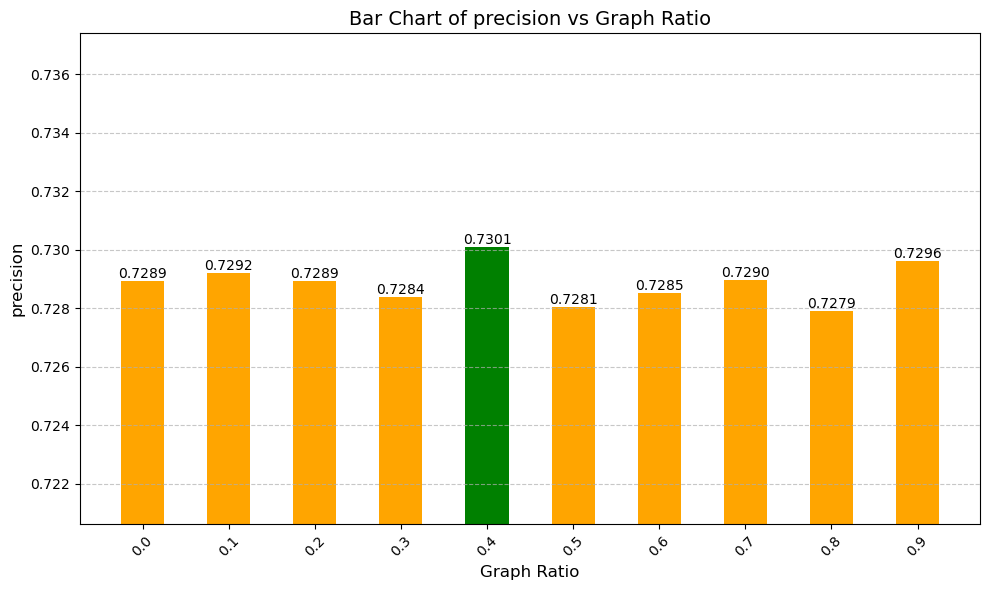

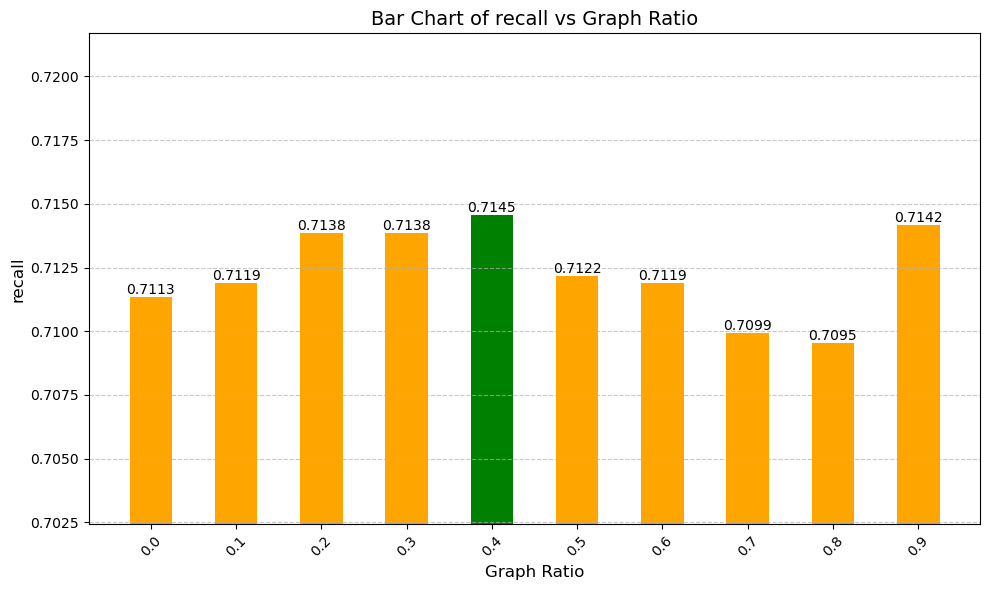

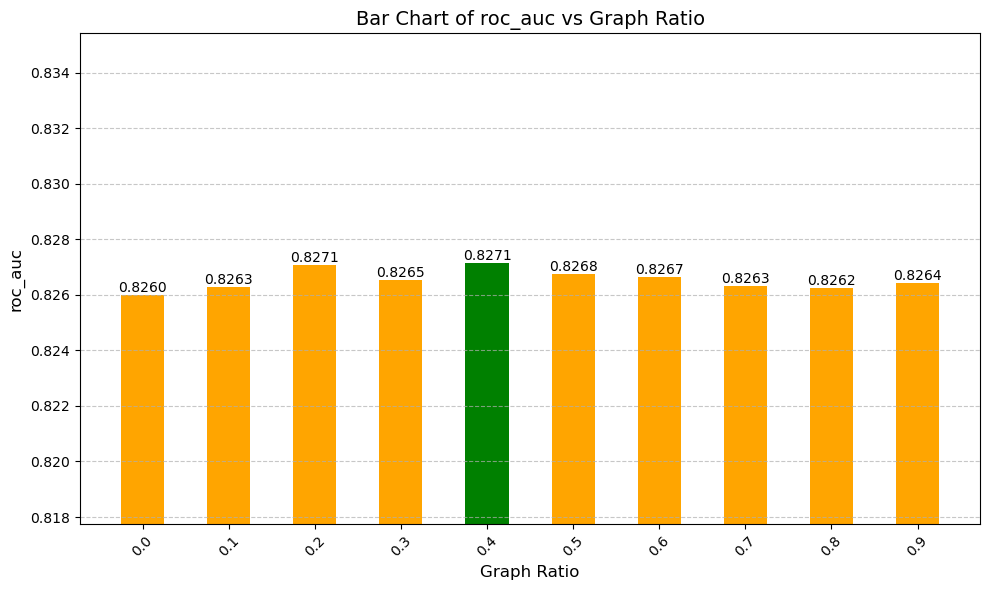

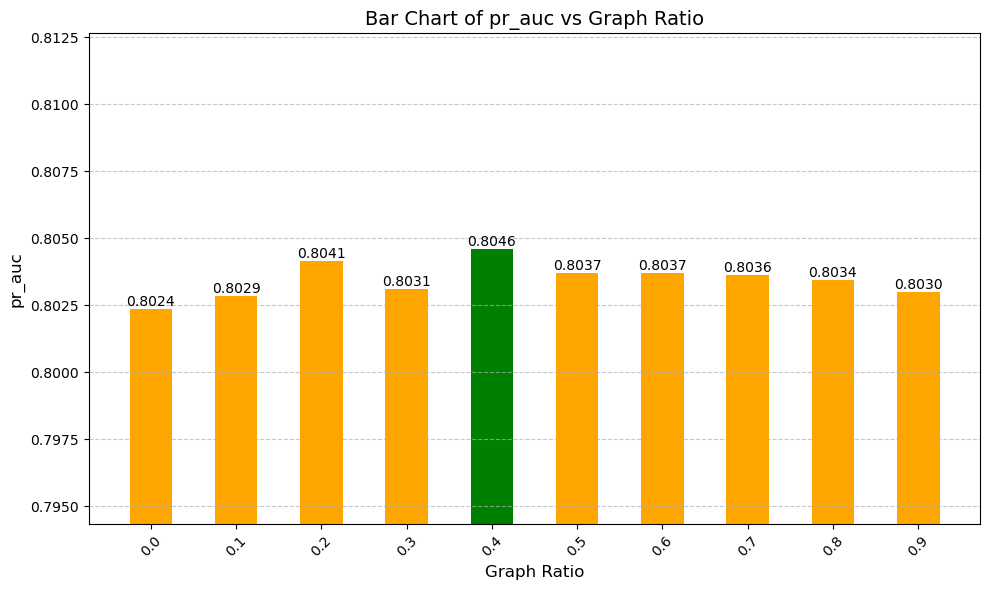

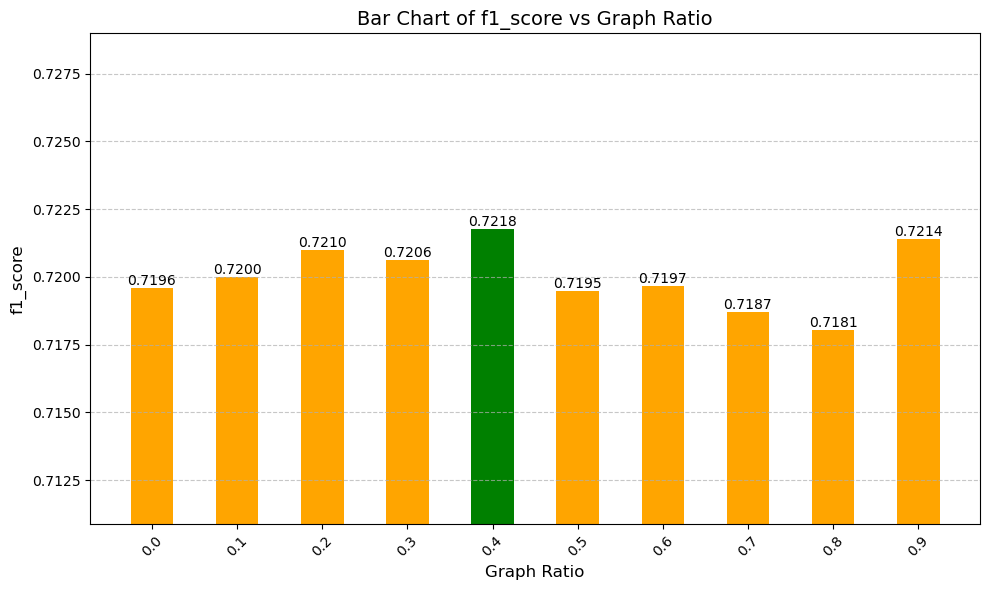

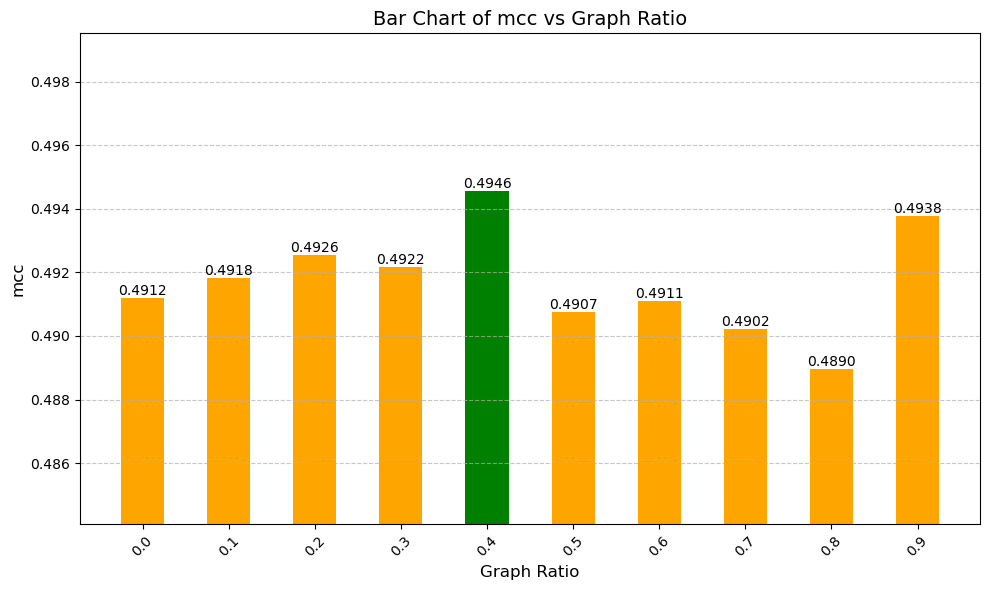

In [28]:
x = merged_df['graph_ratio']

# Create a bar chart for each column (other than graph_ratio)
columns_to_plot = columns_to_plot = [col for col in merged_df.columns if col != 'graph_ratio']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Find the index of the maximum value
    max_idx = merged_df[column].idxmax()
    min_idx = merged_df[column].idxmin()
    
    # Set bar colors (different color for the highest value)
    if column != "loss":
        colors = ['orange' if i != max_idx else 'green' for i in range(len(merged_df))]
    else:
        colors = ['orange' if i != min_idx else 'green' for i in range(len(merged_df))]
    
    # Plot the bars
    bars = plt.bar(x, merged_df[column], color=colors, width=0.05)
    
    # Add value labels on top of each bar
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{bar.get_height():.4f}', ha='center', va='bottom', fontsize=10)
    
    # Adjust the y-axis limit to be relative to the maximum value
    plt.ylim(merged_df[column].min() * 0.99, merged_df[column].max() * 1.01)
    
    # Title and labels
    plt.title(f'Bar Chart of {column} vs Graph Ratio', fontsize=14)
    plt.xlabel('Graph Ratio', fontsize=12)
    plt.ylabel(column, fontsize=12)
    
    # Ensure x-axis shows all graph_ratio labels
    plt.xticks(x, labels=[f'{val:.1f}' for val in x], rotation=45)
    
    # Show grid lines for y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

Now do it for the other dataset

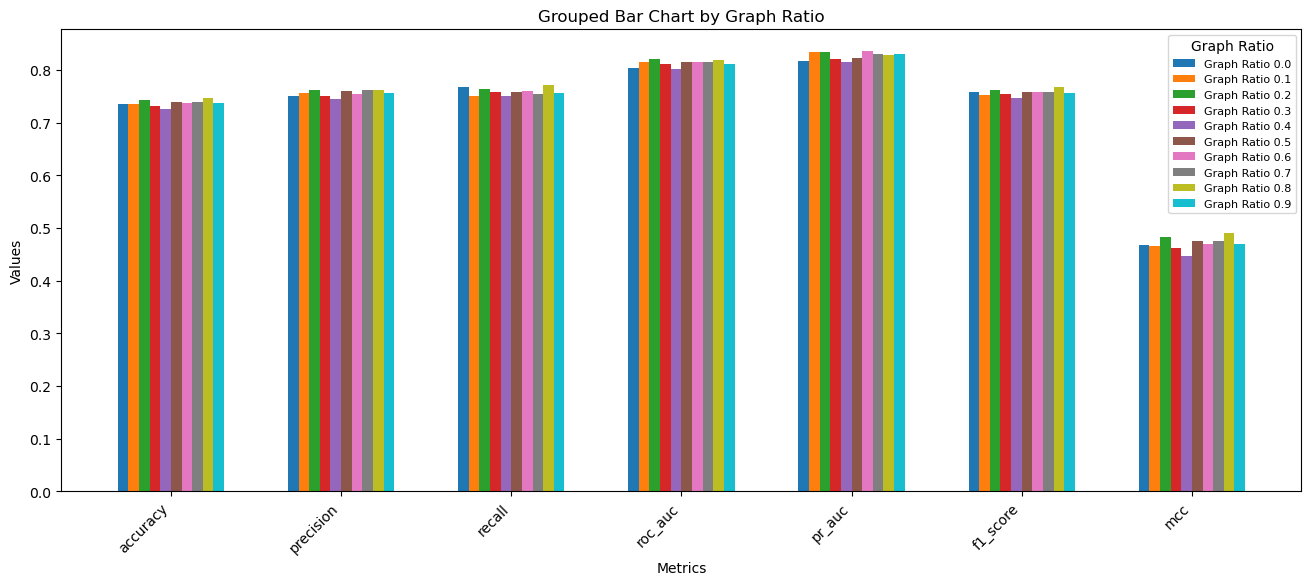

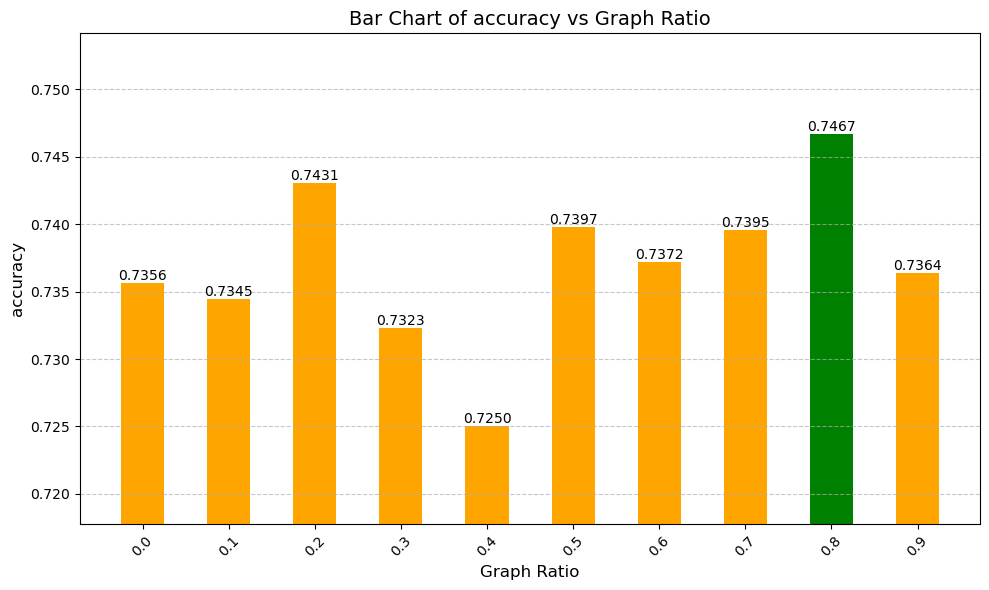

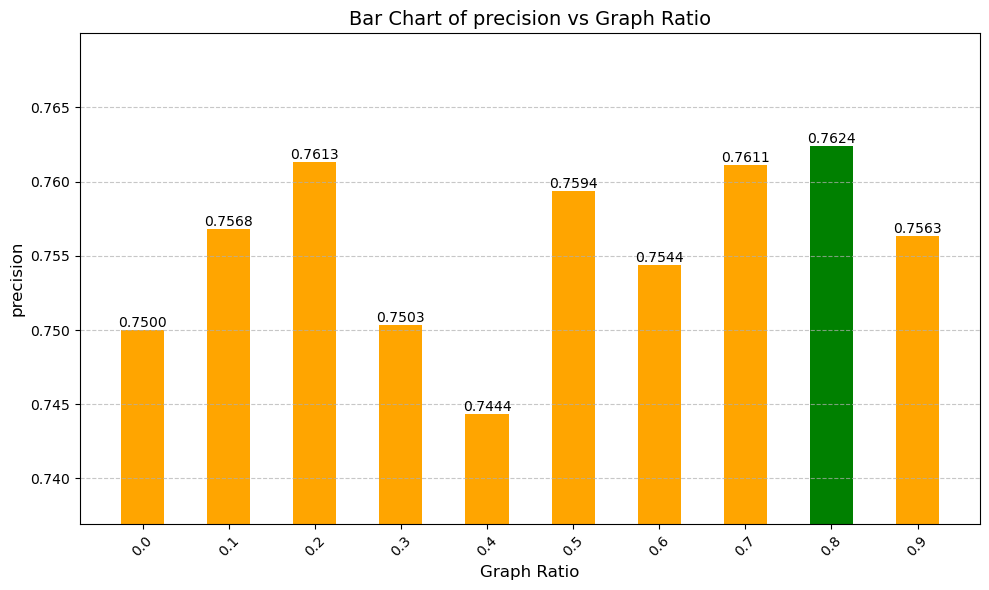

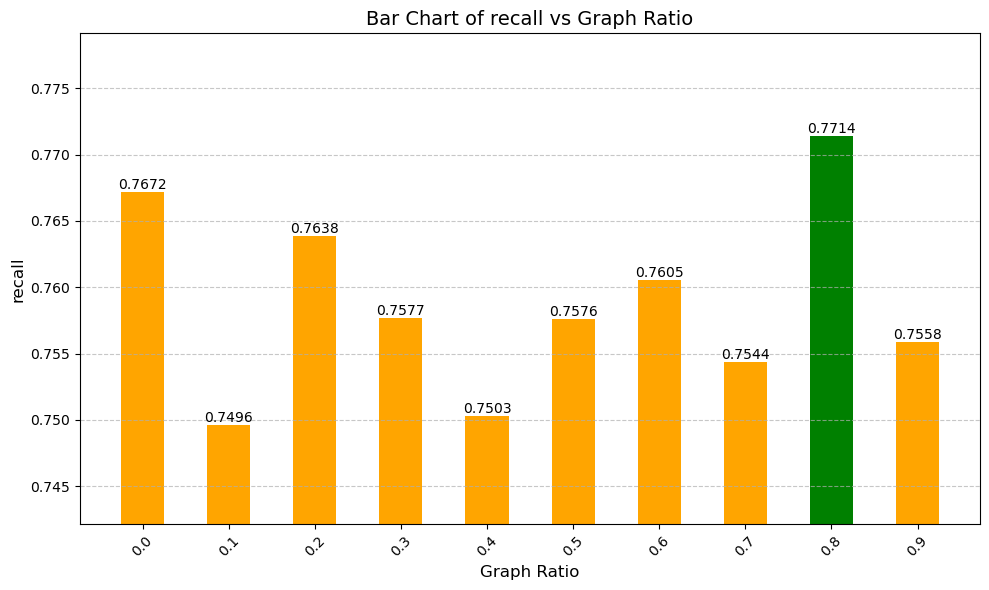

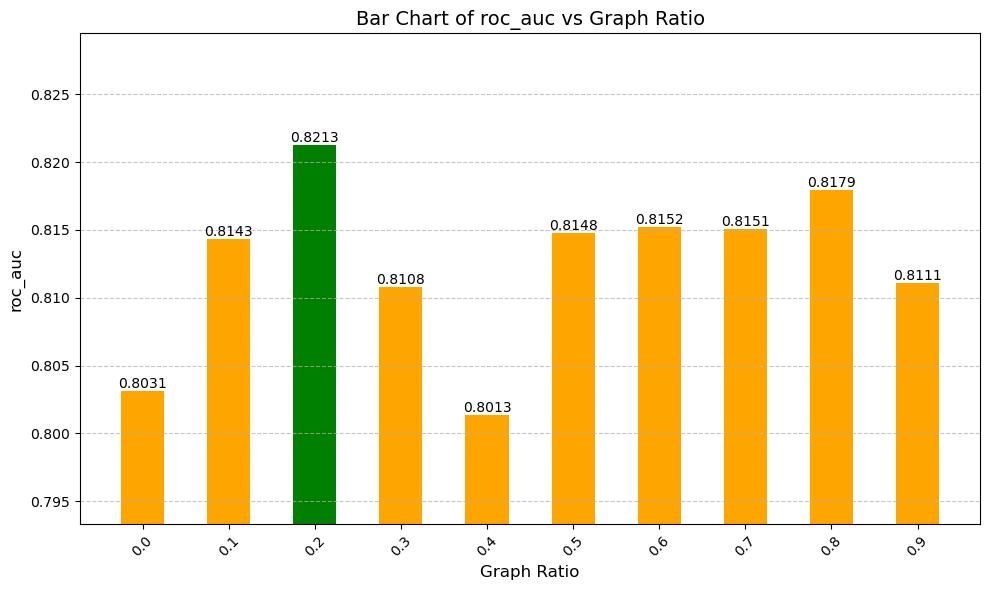

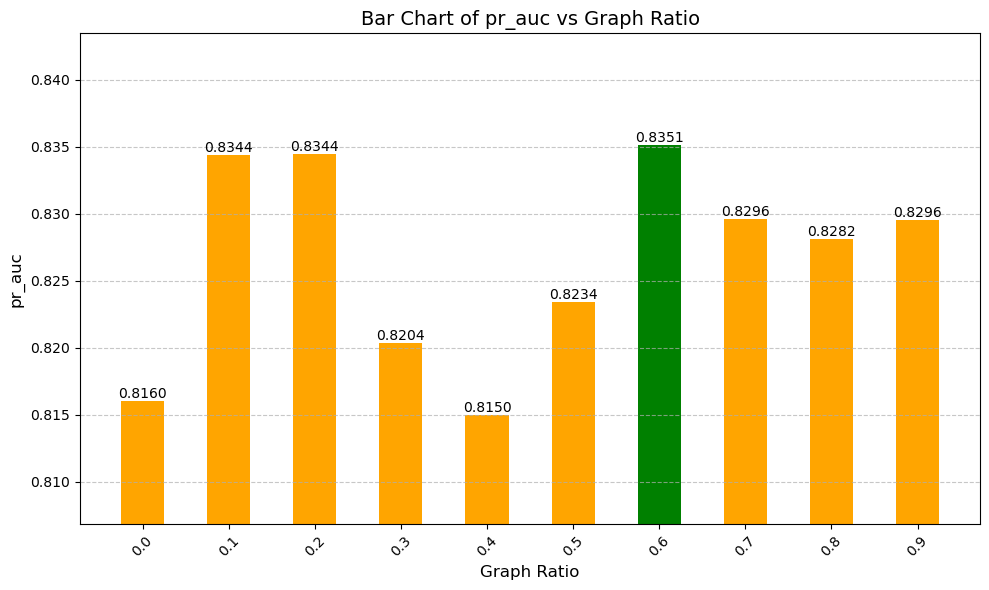

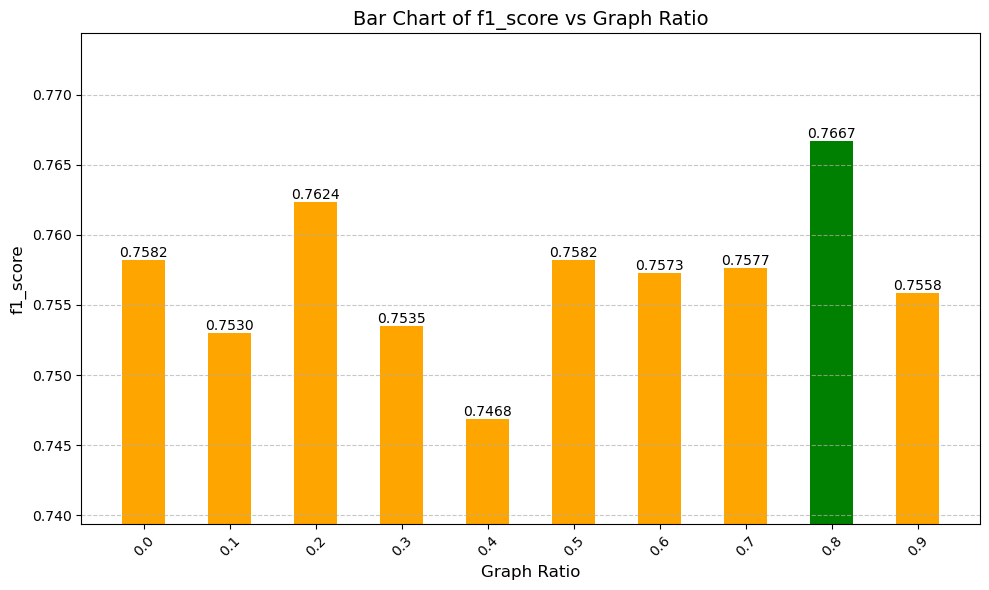

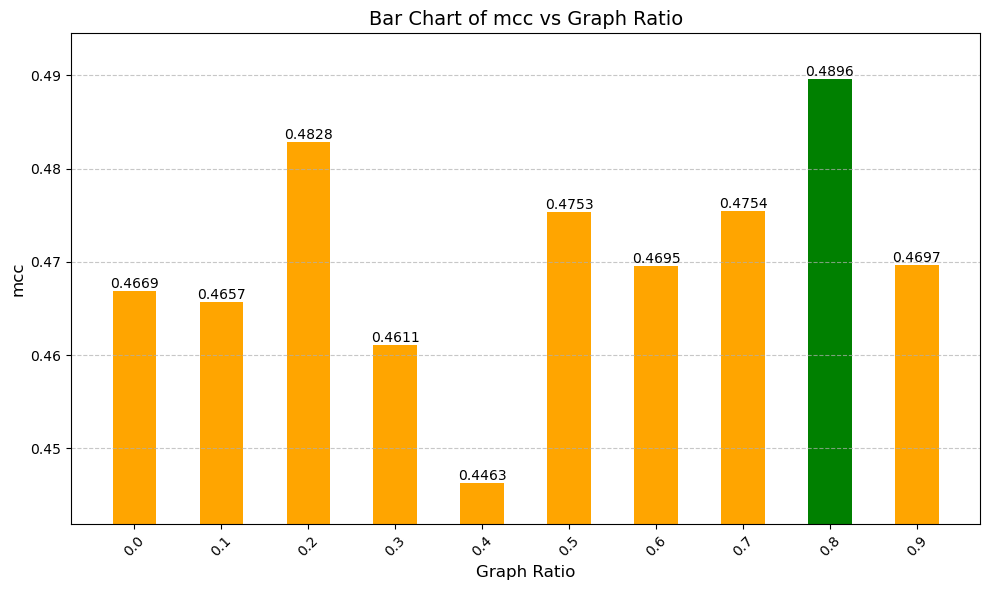

In [29]:
baseline_file = "OnclogyScreen/baseline_OncologyScreen_test_results.csv"
shuffle_file = "OnclogyScreen/rewire_graph_OncologyScreen_test_results_.csv"

base_df = pd.read_csv(baseline_file)
shuffle_df = pd.read_csv(shuffle_file)

shuffle_df = shuffle_df.drop("fold_id", axis=1).drop("graph_function", axis=1)

base_df = base_df.drop("fold_id", axis=1)
base_df["graph_ratio"] = 0.0

merged_df = pd.concat([shuffle_df, base_df], ignore_index=True)
merged_df = merged_df.groupby('graph_ratio').mean().reset_index()
merged_df = merged_df.drop(columns=["loss"])

columns_to_plot = [col for col in merged_df.columns if col != 'graph_ratio']

# Create the bar chart
fig, ax = plt.subplots(figsize=(16, 6))  # Increased figure width

# Adjust bar width and spacing
bar_width = 0.1  # Thinner bars
spacing = 0.6    # Increased spacing between metric groups

# Calculate positions for each metric group
x_indices = [i * (1 + spacing) for i in range(len(columns_to_plot))]

# Generate bars for each graph_ratio
for i, ratio in enumerate(merged_df['graph_ratio'].unique()):
    row_data = merged_df[merged_df['graph_ratio'] == ratio]
    y_values = row_data[columns_to_plot].mean()  # Aggregate values (mean or another metric)
    x_positions = [x + i * bar_width for x in x_indices]  # Offset for each bar in the group
    
    ax.bar(
        x_positions,
        y_values,
        width=bar_width,
        label=f'Graph Ratio {ratio}'
    )

# Configure chart appearance
ax.set_xticks([x + (len(merged_df['graph_ratio'].unique()) - 1) * bar_width / 2 for x in x_indices])
ax.set_xticklabels(columns_to_plot, rotation=45, ha='right')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.legend(title='Graph Ratio', fontsize=8, title_fontsize=10)
ax.set_title('Grouped Bar Chart by Graph Ratio')


plt.show()

x = merged_df['graph_ratio']

# Create a bar chart for each column (other than graph_ratio)
columns_to_plot = columns_to_plot = [col for col in merged_df.columns if col != 'graph_ratio']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Find the index of the maximum value
    max_idx = merged_df[column].idxmax()
    min_idx = merged_df[column].idxmin()
    
    # Set bar colors (different color for the highest value)
    if column != "loss":
        colors = ['orange' if i != max_idx else 'green' for i in range(len(merged_df))]
    else:
        colors = ['orange' if i != min_idx else 'green' for i in range(len(merged_df))]
    
    # Plot the bars
    bars = plt.bar(x, merged_df[column], color=colors, width=0.05)
    
    # Add value labels on top of each bar
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{bar.get_height():.4f}', ha='center', va='bottom', fontsize=10)
    
    # Adjust the y-axis limit to be relative to the maximum value
    plt.ylim(merged_df[column].min() * 0.99, merged_df[column].max() * 1.01)
    
    # Title and labels
    plt.title(f'Bar Chart of {column} vs Graph Ratio', fontsize=14)
    plt.xlabel('Graph Ratio', fontsize=12)
    plt.ylabel(column, fontsize=12)
    
    # Ensure x-axis shows all graph_ratio labels
    plt.xticks(x, labels=[f'{val:.1f}' for val in x], rotation=45)
    
    # Show grid lines for y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

Now for both datasets together

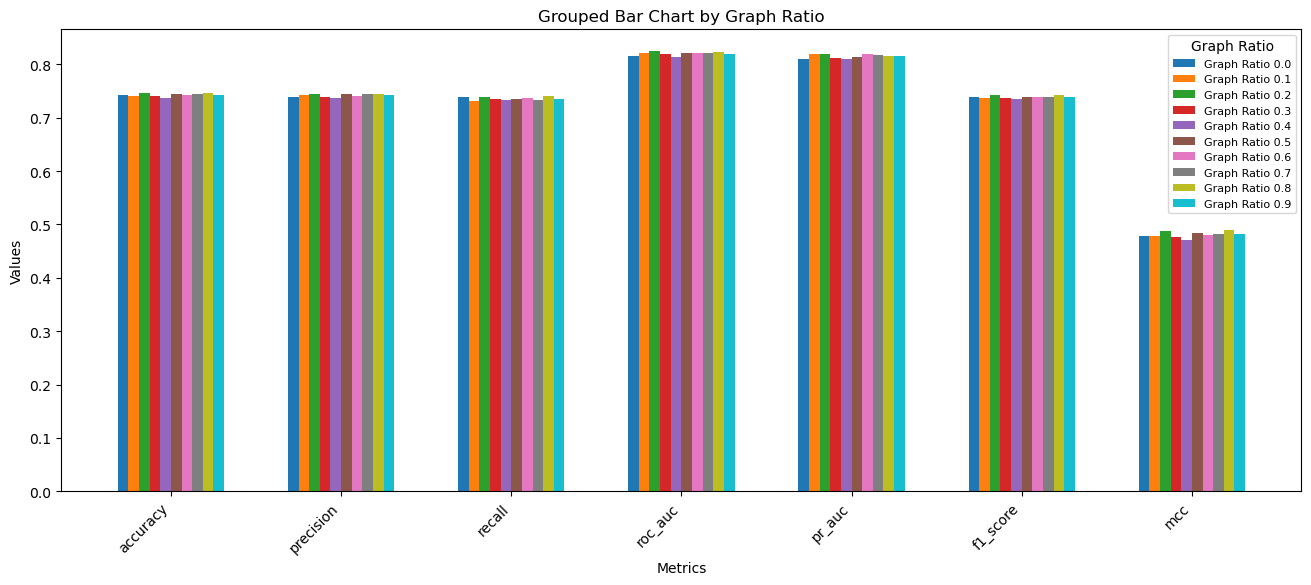

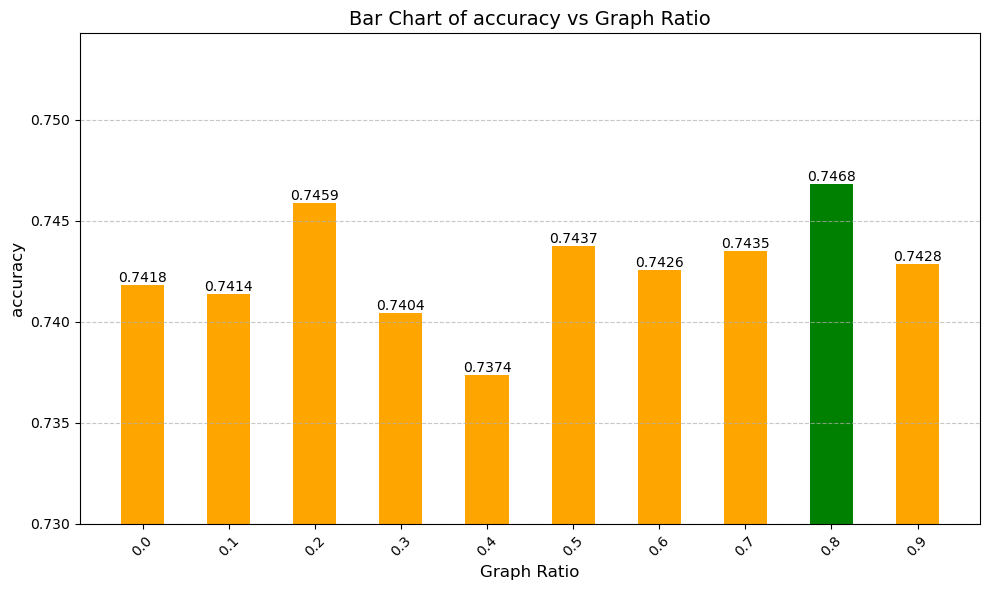

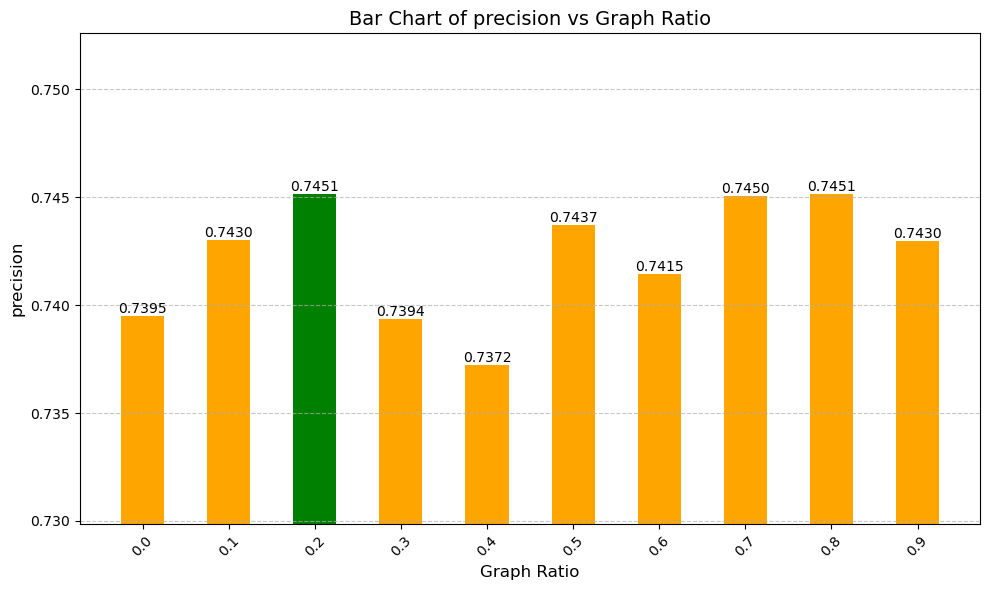

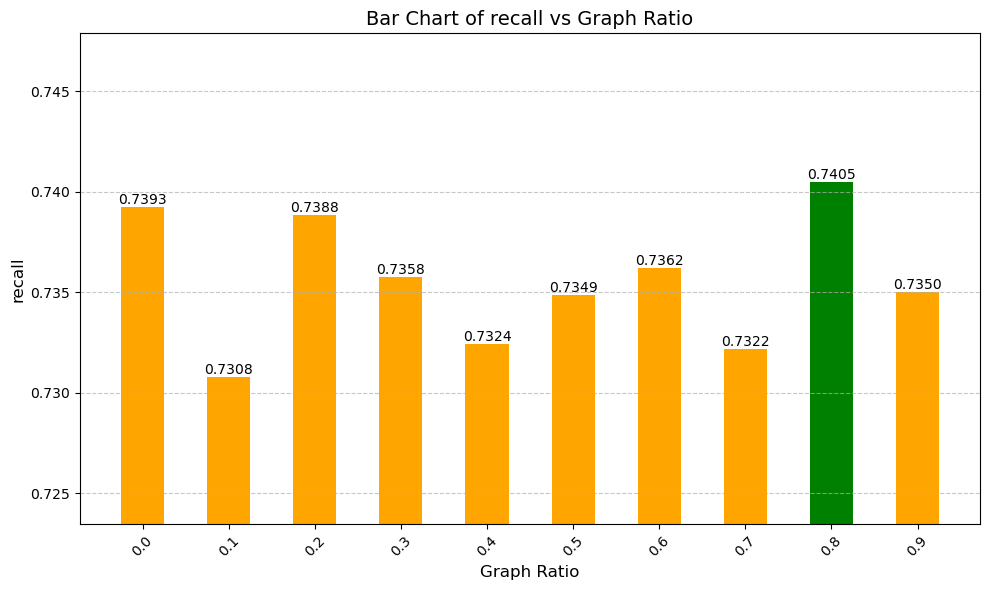

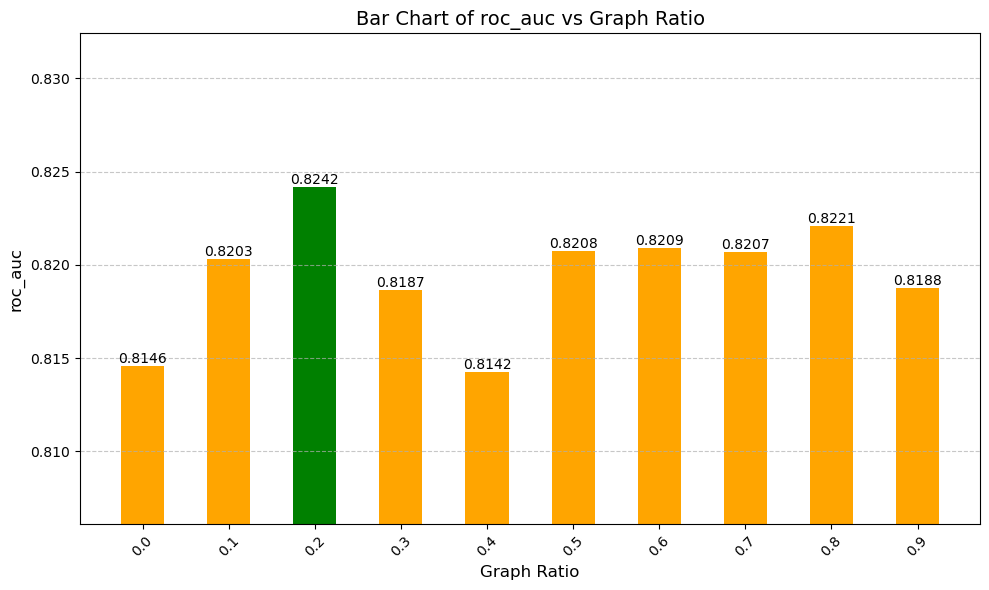

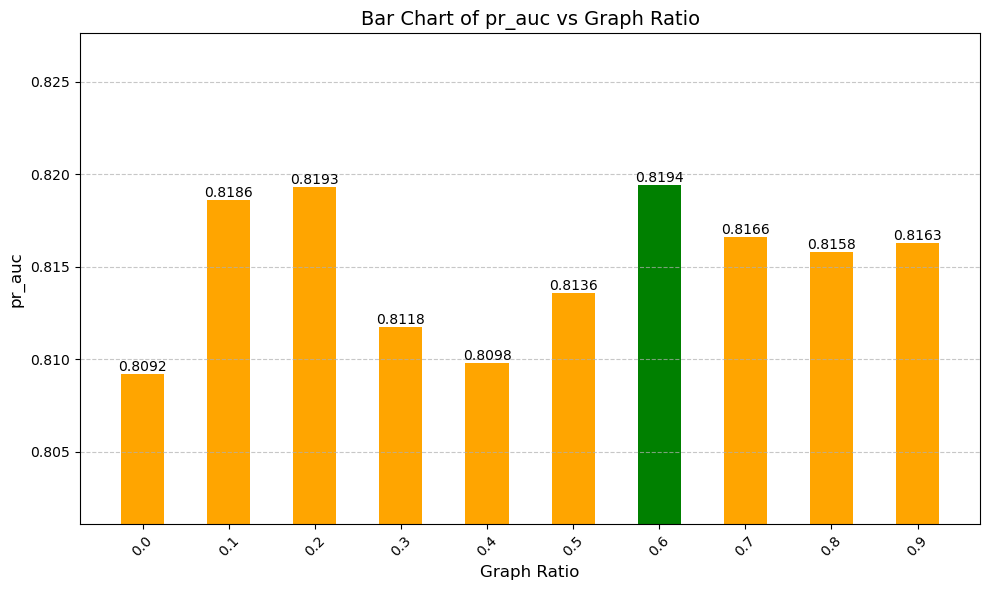

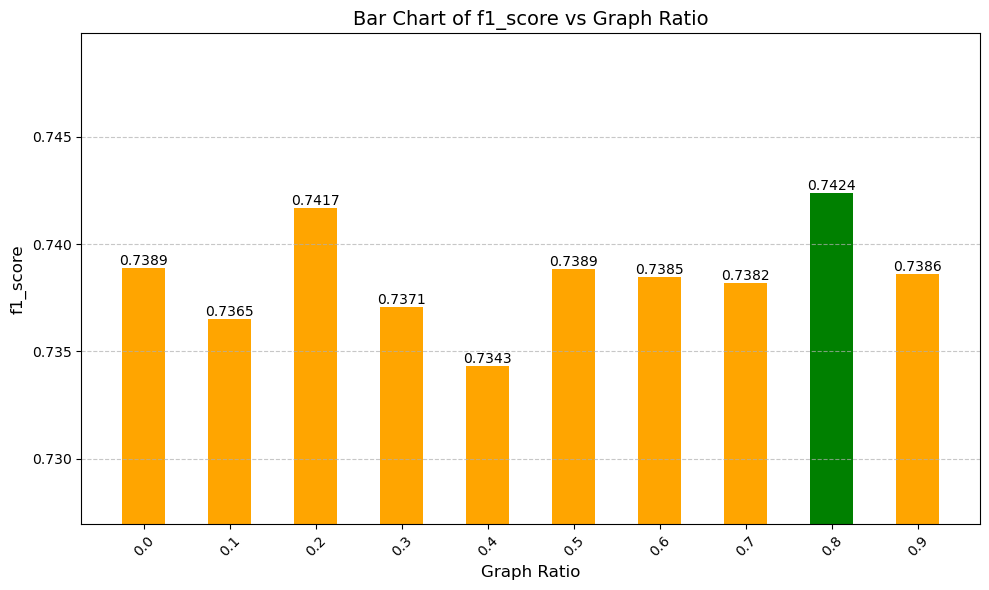

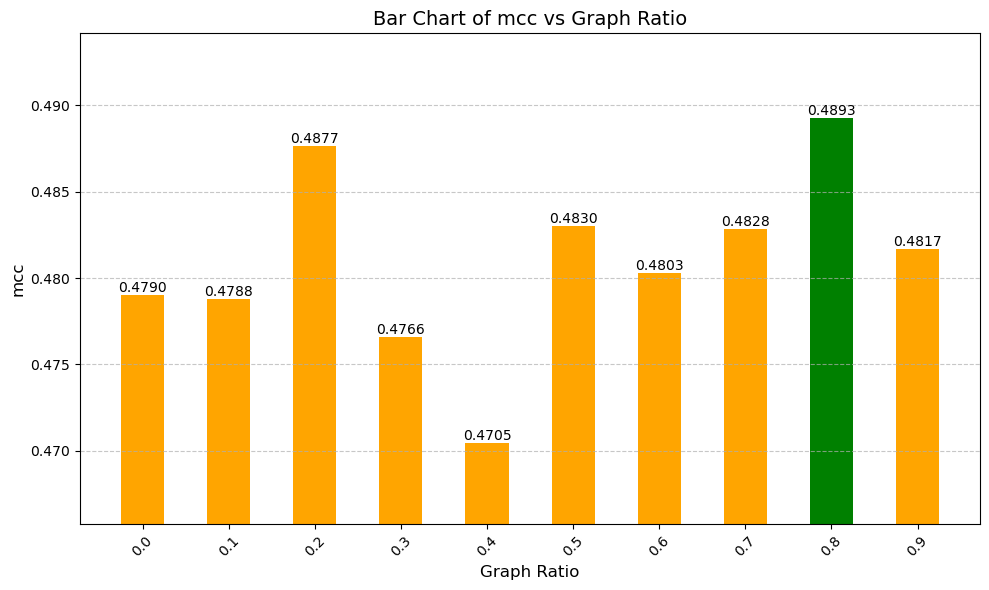

In [30]:
baseline_file1 = "DrugCombDB/baseline_DrugCombDB_test_results.csv"
shuffle_file1 = "DrugCombDB/rewire_graph_DrugCombDB_test_results_.csv"

baseline_file2 = "OnclogyScreen/baseline_OncologyScreen_test_results.csv"
shuffle_file2 = "OnclogyScreen/rewire_graph_OncologyScreen_test_results_.csv"

base_df1 = pd.read_csv(baseline_file1)
shuffle_df1 = pd.read_csv(shuffle_file1)

base_df2 = pd.read_csv(baseline_file2)
shuffle_df2 = pd.read_csv(shuffle_file2)

base_df = pd.concat([base_df1, base_df2])
shuffle_df = pd.concat([shuffle_df1, shuffle_df2])

shuffle_df = shuffle_df.drop("fold_id", axis=1).drop("graph_function", axis=1)

base_df = base_df.drop("fold_id", axis=1)
base_df["graph_ratio"] = 0.0

merged_df = pd.concat([shuffle_df, base_df], ignore_index=True)
merged_df = merged_df.groupby('graph_ratio').mean().reset_index()
merged_df = merged_df.drop(columns=["loss"])

columns_to_plot = [col for col in merged_df.columns if col != 'graph_ratio']

# Create the bar chart
fig, ax = plt.subplots(figsize=(16, 6))  # Increased figure width

# Adjust bar width and spacing
bar_width = 0.1  # Thinner bars
spacing = 0.6    # Increased spacing between metric groups

# Calculate positions for each metric group
x_indices = [i * (1 + spacing) for i in range(len(columns_to_plot))]

# Generate bars for each graph_ratio
for i, ratio in enumerate(merged_df['graph_ratio'].unique()):
    row_data = merged_df[merged_df['graph_ratio'] == ratio]
    y_values = row_data[columns_to_plot].mean()  # Aggregate values (mean or another metric)
    x_positions = [x + i * bar_width for x in x_indices]  # Offset for each bar in the group
    
    ax.bar(
        x_positions,
        y_values,
        width=bar_width,
        label=f'Graph Ratio {ratio}'
    )

# Configure chart appearance
ax.set_xticks([x + (len(merged_df['graph_ratio'].unique()) - 1) * bar_width / 2 for x in x_indices])
ax.set_xticklabels(columns_to_plot, rotation=45, ha='right')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.legend(title='Graph Ratio', fontsize=8, title_fontsize=10)
ax.set_title('Grouped Bar Chart by Graph Ratio')


plt.show()

x = merged_df['graph_ratio']

# Create a bar chart for each column (other than graph_ratio)
columns_to_plot = columns_to_plot = [col for col in merged_df.columns if col != 'graph_ratio']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Find the index of the maximum value
    max_idx = merged_df[column].idxmax()
    min_idx = merged_df[column].idxmin()
    
    # Set bar colors (different color for the highest value)
    if column != "loss":
        colors = ['orange' if i != max_idx else 'green' for i in range(len(merged_df))]
    else:
        colors = ['orange' if i != min_idx else 'green' for i in range(len(merged_df))]
    
    # Plot the bars
    bars = plt.bar(x, merged_df[column], color=colors, width=0.05)
    
    # Add value labels on top of each bar
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{bar.get_height():.4f}', ha='center', va='bottom', fontsize=10)
    
    # Adjust the y-axis limit to be relative to the maximum value
    plt.ylim(merged_df[column].min() * 0.99, merged_df[column].max() * 1.01)
    
    # Title and labels
    plt.title(f'Bar Chart of {column} vs Graph Ratio', fontsize=14)
    plt.xlabel('Graph Ratio', fontsize=12)
    plt.ylabel(column, fontsize=12)
    
    # Ensure x-axis shows all graph_ratio labels
    plt.xticks(x, labels=[f'{val:.1f}' for val in x], rotation=45)
    
    # Show grid lines for y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()